In [60]:
import os
from collections import defaultdict

import fasttext
import fasttext.util

import matplotlib.pyplot as plt

In [61]:
training_path = '../scripts/trainings/'
models = sorted([training_path + file_name for file_name in os.listdir('../scripts/trainings') if file_name != '.DS_Store'])
print(models)

['../scripts/trainings/fasttext_dim-100_epoch-10_loss-hs_nongrams', '../scripts/trainings/fasttext_dim-100_epoch-10_loss-ns_nongrams', '../scripts/trainings/fasttext_dim-100_epoch-7_loss-hs_nongrams', '../scripts/trainings/fasttext_dim-100_epoch-7_loss-ns_nongrams']


In [62]:
words = ['sunset', 'song', 'music', 'ibiza', 'people', 'school', 'laptop', 'computer', 'sand', 'sky', 'player']

In [63]:
neighbors = defaultdict(lambda: defaultdict(list))
for model_name in models:
    model = fasttext.load_model(model_name + '/model.bin')
    for word in words:
        neighbors[model_name][word] = model.get_nearest_neighbors(word)

In [65]:
for model_name in neighbors:
    print(model_name.split('/')[-1])
    for word in words:
        print(word, [x for x in neighbors[model_name][word] if x[0] >= 0.7])
    print()

fasttext_dim-100_epoch-10_loss-hs_nongrams
sunset [(0.8413429856300354, 'sunrise'), (0.7551589012145996, 'dusk'), (0.7284934520721436, 'twilight'), (0.7172954678535461, 'pier')]
song [(0.7783233523368835, 'songs'), (0.7543286681175232, 'sings')]
music [(0.7228034734725952, 'performer'), (0.7011609077453613, 'video')]
ibiza []
people []
school [(0.7446157336235046, 'elementary'), (0.7130692005157471, 'university')]
laptop [(0.8466449975967407, 'computer'), (0.8266153931617737, 'tablet'), (0.755362868309021, 'smartphone'), (0.7409310340881348, 'typing')]
computer [(0.8466450572013855, 'laptop'), (0.7366807460784912, 'desktop'), (0.7146151065826416, 'smartphone'), (0.7096604108810425, 'tablet'), (0.7087573409080505, 'keyboard'), (0.7023630738258362, 'screen')]
sand [(0.7707832455635071, 'sandy'), (0.7607805132865906, 'sands'), (0.7378944158554077, 'dunes'), (0.7130544781684875, 'beach'), (0.7015928626060486, 'starfish')]
sky [(0.792946457862854, 'clouds'), (0.7660847306251526, 'skies'), (

In [53]:
selected_model = '../scripts/trainings/fasttext_dim-100_epoch-7_loss-hs_nongrams/model.bin'
reduced_model = fasttext.util.reduce_model(fasttext.load_model(selected_model), 2)

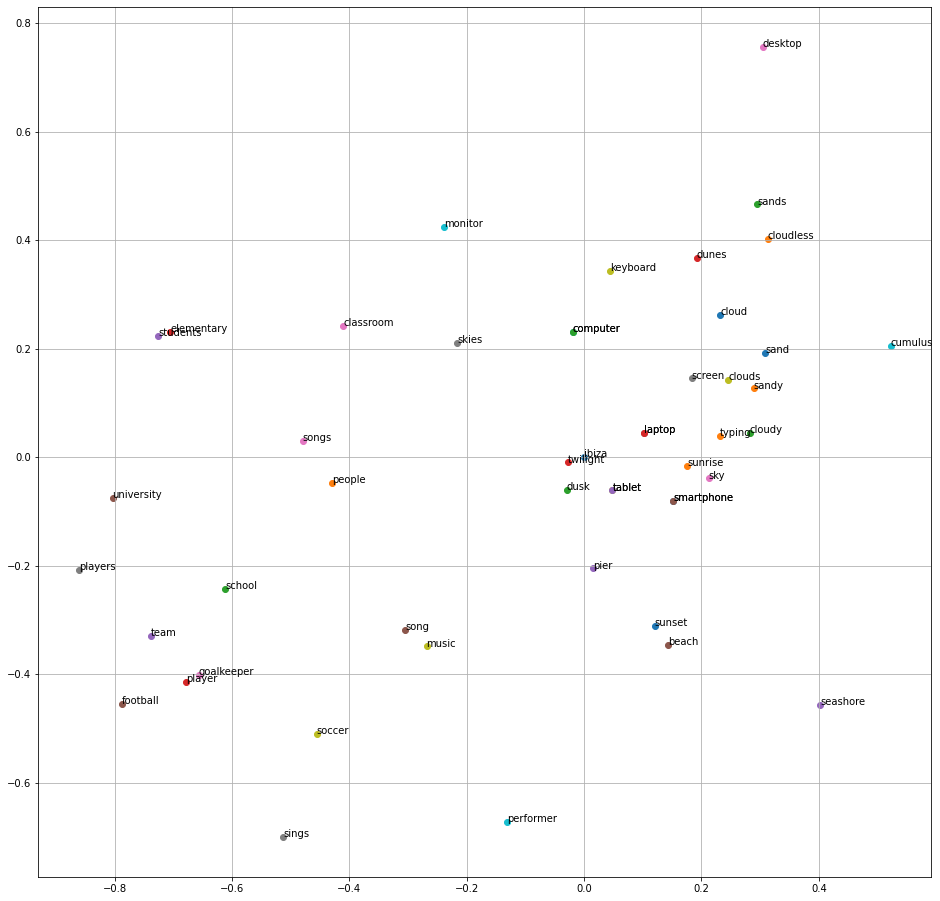

In [54]:
model = fasttext.load_model(selected_model)
plt.figure(figsize=(16, 16))
for word in words:
    plt.scatter(*reduced_model[word].tolist())
    plt.annotate(word, reduced_model[word].tolist())
    for confidence, neighbor in model.get_nearest_neighbors(word):
        if confidence >= 0.7:
            plt.scatter(*reduced_model[neighbor].tolist())
            plt.annotate(neighbor, reduced_model[neighbor].tolist())
plt.grid()
plt.show()

In [42]:
%%timeit
# dim=100
model.get_nearest_neighbors(word)

1.55 ms ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%%timeit
# dim=200
model.get_nearest_neighbors(word)

3.47 ms ± 5.54 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
